# Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import re
import wordcloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot
import warnings
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

# Data frame de papers

In [2]:
papers = pd.read_csv("papers.csv")
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


# Limpieza de datos

Borraremos los datos que no usaremos

In [3]:
papers = papers.drop(columns=['id','event_type','pdf_name'])
papers.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


# Titulos limpieza

Usaremos la limpieza de los titulos para poder crear modelos de prediccion ya que nesesitamos dejar solo las palabras que se ocuparan para crear el modelo de prediccion y eliminando los simbolos y las mayusculas para evitar la repeticion de errores de palabras

In [4]:
print(papers['title'].head())
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())
papers['title_processed'].head()

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object


0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_processed, dtype: object

# Wordcloud de titulos

Crearemos un wordcloud para ver cuales palabras son las más comunes de manera grafica de manera visual

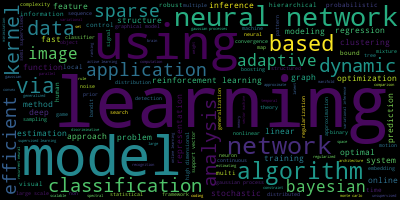

In [5]:
long_string = ' '.join(papers['title_processed'])
wordcloud = wordcloud.WordCloud()
wordcloud.generate(long_string)
wordcloud.to_image()

# Palabras mas comunes en titulos 

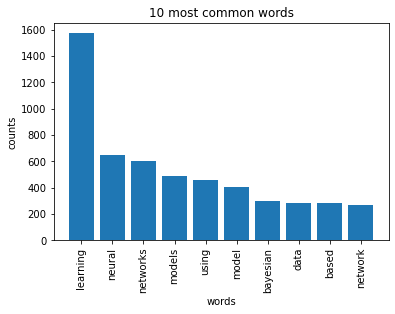

In [6]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

count_vectorizer = CountVectorizer(stop_words='english')

count_data = count_vectorizer.fit_transform(papers['title_processed'])

plot_10_most_common_words(count_data, count_vectorizer)

# Modelo de prediccion de LDA y LSA

In [7]:
warnings.simplefilter("ignore", DeprecationWarning) 
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % )
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
number_topics = 5 
number_words = 5

lda = LDA(n_components=number_topics)
lda.fit(count_data)

lsa = TruncatedSVD(n_components=number_topics)
lsa.fit(count_data)


print("Topicos encontrados via LDA:")
print_topics(lda, count_vectorizer, number_words)

print("\n")

print("Topicos encontrados via LSA:")
print_topics(lsa, count_vectorizer, number_words)





Topicos encontrados via LDA:

Topic #0:
models using recognition data clustering

Topic #1:
neural networks learning network recurrent

Topic #2:
models gaussian inference analysis learning

Topic #3:
learning optimization stochastic algorithms gradient

Topic #4:
learning model multi based dynamic


Topicos encontrados via LSA:

Topic #0:
learning networks neural using reinforcement

Topic #1:
neural networks network using recurrent

Topic #2:
models using inference bayesian gaussian

Topic #3:
model using network based recognition

Topic #4:
neural network model models based


## Calculo de la perplejidad de los topicos 

In [68]:
lda_top=lda.fit_transform(count_data)
print('Perplejidad por cada topico \n')
for i,topic in enumerate(lda_top[0]):
  print("Topico ",i,": ",topic*100)

Perplejidad por cada topico 

Topico  0 :  3.4199777462162384
Topico  1 :  3.3732565207650977
Topico  2 :  3.442759095219858
Topico  3 :  86.41139925083833
Topico  4 :  3.3526073869604835


In [67]:
lsa_top=lsa.fit_transform(count_data)
l=lsa_top[0]
print('Perplejidad por cada topico \n')
for i,topic in enumerate(l):
  print("Topico ",i," : ",topic*100)

Perplejidad por cada topico 

Topico  0  :  2.506825209579861
Topico  1  :  3.0020166823930636
Topico  2  :  1.8345407716336068
Topico  3  :  2.4708130660285517
Topico  4  :  1.0235882126690654
